In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
A: np.ndarray = np.random.normal(loc=0.0, scale=1.0, size=(100, 10))
A

array([[ 8.37359334e-01,  3.94824262e-01,  1.17030041e+00,
        -1.30967773e+00, -1.05113737e+00,  3.93196857e-01,
         1.05222214e-01,  1.41025614e-01,  8.32100263e-01,
         1.48198542e+00],
       [ 8.75528174e-01, -9.38160870e-01, -3.17261372e-01,
        -1.56040320e-01, -3.78042275e-01,  1.25187392e+00,
        -6.45745534e-01,  3.28944040e-01,  1.10949101e+00,
        -7.01601886e-01],
       [-5.95762812e-01, -8.96986038e-01,  1.51941777e+00,
         7.82426630e-01, -2.44398086e+00, -5.18090806e-01,
        -9.89716862e-01,  1.36679825e+00,  5.98240965e-01,
         1.26598665e+00],
       [ 7.16613415e-01, -1.65788410e+00, -8.47208955e-01,
        -6.31414223e-01, -7.97939185e-01,  1.25842147e+00,
         3.07725528e-01, -3.40674389e-01,  7.74820856e-01,
        -5.38993964e-01],
       [ 2.31524762e-01,  5.33012395e-01,  2.46520203e+00,
         8.33418766e-01,  2.57611718e-01, -1.13285536e+00,
        -1.01134016e+00, -4.82006732e-01,  1.95224482e+00,
        -2.

In [ ]:
def gram_schmidt_orthogonalization(A: np.ndarray) -> np.ndarray:
    """
    Orthogonal basis U_i = A_i - sum_0_i-1(A_i.T @ U_i-1 / U_i-1.T @ U_i-1 * U_i-1)

    Can be thought of as retaining any information not already explained by the 
    previously calculated orthogonal vectors. In other words, we remove any information 
    already contained in previously calculated orthogonal vectors. 
    """
    
    # Initialize the orthognal matrix / basis
    A_orthogonal: np.ndarray = np.empty(shape=A.shape)

    for column in np.arange(start=0, stop=A.shape[1], step=1):
        
        # Initialize the orthogonal vector with the current column
        A_orthogonal[:, column] = A[:, column]
        
        for previous_column in np.arange(start=0, stop=column, step=1):

            # Subtract information that the previous orthogonal vectors capture from the current vector
            A_orthogonal[:, column] -= (
                (
                    (A[:, column].T @ A_orthogonal[:, previous_column]) 
                    / (A_orthogonal[:, previous_column].T @ A_orthogonal[:, previous_column])
                ) * A_orthogonal[:, previous_column]
            )

    return A_orthogonal

<Axes: >

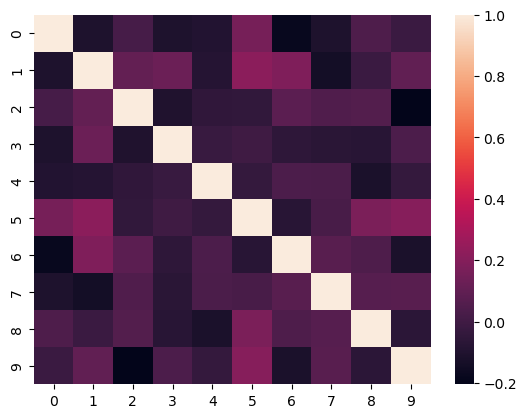

In [80]:
sns.heatmap(data=pd.DataFrame(A).round(3).corr())

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.008285,0.000203,-0.000803,-0.003332,-0.001684,-0.006080,-0.002491,0.001575,-0.001319
1,-0.008285,1.000000,0.001922,-0.006232,-0.027112,-0.014029,-0.049669,-0.019907,0.012831,-0.010532
2,0.000203,0.001922,1.000000,0.000195,0.000753,0.000444,0.001463,0.000550,-0.000327,0.000313
3,-0.000803,-0.006232,0.000195,1.000000,-0.002449,-0.001298,-0.004556,-0.001840,0.001198,-0.000970
4,-0.003332,-0.027112,0.000753,-0.002449,1.000000,-0.005537,-0.019968,-0.008029,0.005150,-0.004179
5,-0.001684,-0.014029,0.000444,-0.001298,-0.005537,1.000000,-0.010372,-0.004208,0.002615,-0.002181
6,-0.006080,-0.049669,0.001463,-0.004556,-0.019968,-0.010372,1.000000,-0.014596,0.009322,-0.007735
7,-0.002491,-0.019907,0.000550,-0.001840,-0.008029,-0.004208,-0.014596,1.000000,0.003715,-0.003136
8,0.001575,0.012831,-0.000327,0.001198,0.005150,0.002615,0.009322,0.003715,1.000000,0.001979
9,-0.001319,-0.010532,0.000313,-0.000970,-0.004179,-0.002181,-0.007735,-0.003136,0.001979,1.000000


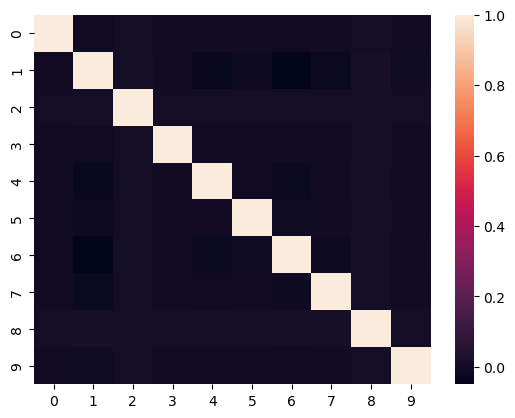

In [84]:
A_orthogonal: np.ndarray = gram_schmidt_orthogonalization(A=A)
sns.heatmap(data=pd.DataFrame(A_orthogonal).round(3).corr())
pd.DataFrame(A_orthogonal).round(3).corr()

In [85]:
A: np.ndarray = np.array(
    [
        [1, 1, 1],
        [-1, 0, 1],
        [1, 1, 2]
    ]
)
A_orthogonal: np.ndarray = gram_schmidt_orthogonalization(A=A)

In [86]:
A_orthogonal.round(3)

array([[ 1.   ,  0.333, -0.5  ],
       [-1.   ,  0.667,  0.   ],
       [ 1.   ,  0.333,  0.5  ]])

In [87]:
A_orthonormal: np.ndarray = A_orthogonal / np.linalg.norm(A_orthogonal, ord=2, axis=0)
A_orthonormal, np.linalg.norm(A_orthonormal, ord=2, axis=0)

(array([[ 5.77350269e-01,  4.08248290e-01, -7.07106781e-01],
        [-5.77350269e-01,  8.16496581e-01,  3.14018492e-16],
        [ 5.77350269e-01,  4.08248290e-01,  7.07106781e-01]]),
 array([1., 1., 1.]))

In [88]:
pd.DataFrame(A_orthonormal).corr().round(3)

,0,1,2
0,1.0,-1.0,-0.0
1,-1.0,1.0,0.0
2,-0.0,0.0,1.0
